In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Spectrometer/"

fig_folder = path + "Figures/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

fluo_liquide = pd.read_csv(path + "20240229_Fluo_liquide_spectrum" + ".csv", delimiter=";", decimal=".")
ENS_blue = pd.read_csv(path + "20240229_ENS_blue" + ".csv", delimiter=";", decimal=".")
ENS_green = pd.read_csv(path + "20240229_ENS_green" + ".csv", delimiter=";", decimal=".")
ENS_red = pd.read_csv(path + "20240229_ENS_red" + ".csv", delimiter=";", decimal=".")
ENS_violet = pd.read_csv(path + "20240229_ENS_violet" + ".csv", delimiter=";", decimal=".")
chlamy = pd.read_csv(path + "Chlamy_spectrum" + ".csv", delimiter=";", decimal=",")

fluo_liquide_baseline = np.mean(fluo_liquide["intensity"][tools.closest_index(fluo_liquide["wavelength"], 300):tools.closest_index(fluo_liquide["wavelength"], 400)])
fluo_liquide["intensity"] = fluo_liquide["intensity"] - fluo_liquide_baseline
fluo_liquide["intensity"] = fluo_liquide["intensity"] / np.trapz(fluo_liquide["intensity"], fluo_liquide["wavelength"])

ENS_blue_baseline = np.mean(ENS_blue["intensity"][tools.closest_index(ENS_blue["wavelength"], 300):tools.closest_index(ENS_blue["wavelength"], 400)])
ENS_blue["intensity"] = ENS_blue["intensity"] - ENS_blue_baseline
ENS_blue["intensity"] = ENS_blue["intensity"] / np.trapz(ENS_blue["intensity"], ENS_blue["wavelength"])

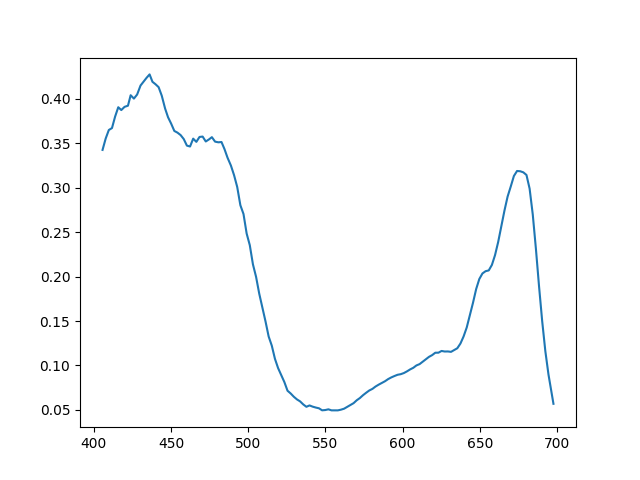

In [3]:
fig, ax = plt.subplots()
ax.plot(chlamy["wavelength"], chlamy["absorption"], label="Chlamy")

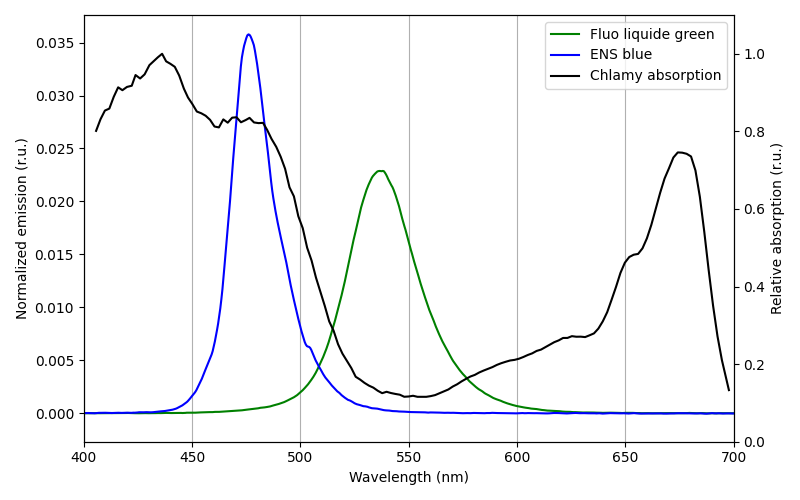

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(fluo_liquide["wavelength"], fluo_liquide["intensity"], label="Fluo liquide green", color = "green")
ax.plot(ENS_blue["wavelength"], ENS_blue["intensity"], label="ENS blue", color = "blue")
#ax.plot(ENS_green["wavelength"], ENS_green["intensity"]/ENS_green["intensity"].max(), '--' ,label="ENS green", color = "green")
#ax.plot(ENS_red["wavelength"], ENS_red["intensity"]/ENS_red["intensity"].max(), label="ENS red", color = "red")
#ax.plot(ENS_violet["wavelength"], ENS_violet["intensity"]/ENS_violet["intensity"].max(), label="ENS violet", color = "violet")
ax2 = ax.twinx()
ax2.plot(chlamy["wavelength"], chlamy["absorption"]/chlamy["absorption"].max(), label="Chlamy absorption", color = "black")
ax.plot([], [], label="Chlamy absorption", color = "black")

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Normalized emission (r.u.)")
ax2.set_ylabel("Relative absorption (r.u.)")
ax.set_xlim(400, 700)
ax.grid(which = 'both', axis = 'x')
ax.legend()
ax2.set_ylim(0, 1.1)
fig.tight_layout()

fig.savefig(fig_folder + "Fluo_liquide_ENS_chlamy_spectrum.png", dpi=300)


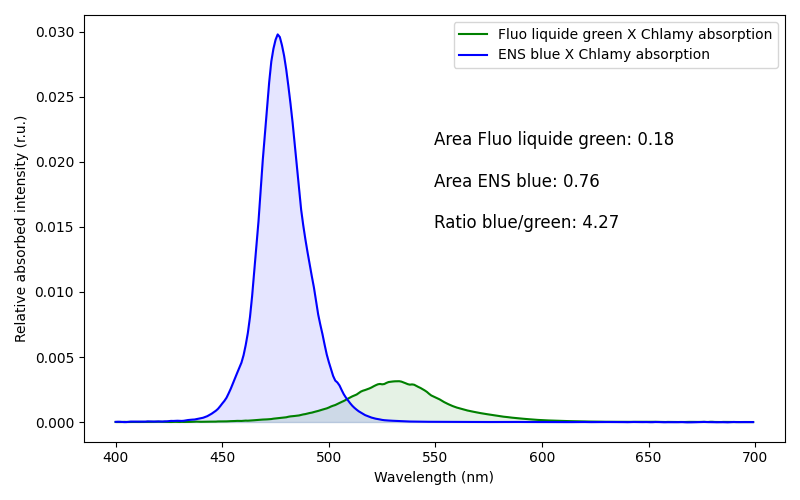

In [5]:
common_x = np.arange(400, 700, 1)

interpolate_fluo_liquide = np.interp(common_x, fluo_liquide["wavelength"], fluo_liquide["intensity"])
interpolate_ENS_blue = np.interp(common_x, ENS_blue["wavelength"], ENS_blue["intensity"])
interpolate_chlamy = np.interp(common_x, chlamy["wavelength"], chlamy["absorption"]/chlamy["absorption"].max())

absorbed_fluo_liquide = interpolate_chlamy * interpolate_fluo_liquide
absorbed_ENS_blue = interpolate_chlamy * interpolate_ENS_blue

area_fluo_liquide = np.trapz(absorbed_fluo_liquide, common_x)
area_ENS_blue = np.trapz(absorbed_ENS_blue, common_x)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(common_x, absorbed_fluo_liquide, label="Fluo liquide green X Chlamy absorption", color = "green")
ax.plot(common_x, absorbed_ENS_blue, label="ENS blue X Chlamy absorption", color = "blue")
ax.fill_between(common_x, 0, absorbed_fluo_liquide, color="green", alpha=0.1)
ax.fill_between(common_x, 0, absorbed_ENS_blue, color="blue", alpha=0.1)
ax.legend()
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Relative absorbed intensity (r.u.)")

ax.text(0.5, 0.5, f"Area Fluo liquide green: {area_fluo_liquide:.2f}\n\nArea ENS blue: {area_ENS_blue:.2f}\n\nRatio blue/green: {area_ENS_blue/area_fluo_liquide:.2f}", transform=ax.transAxes, fontsize=12)

fig.tight_layout()

fig.savefig(fig_folder + "Absorbed_fluo_liquide_ENS_blue.png", dpi=300)



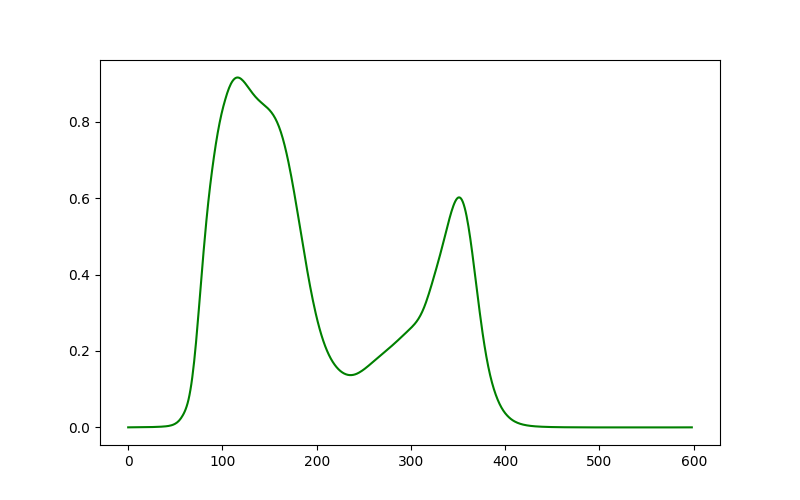

In [6]:
test = np.convolve(interpolate_ENS_blue, interpolate_chlamy, mode="full")
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(test, label="Fluo liquide green X Chlamy absorption", color = "green")